In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics 
from collections import Counter
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import seaborn as sns
# from sklearn.model_selection import KFold
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/My Data files/water_potability.csv")
len(data)

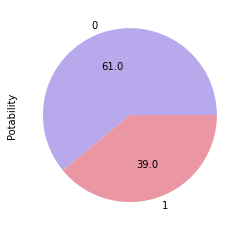

In [ ]:
data['Potability'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f", colors = ['#b7a9ec', '#ea96a3'])

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Plotting the various features vs the percentage of values missing.

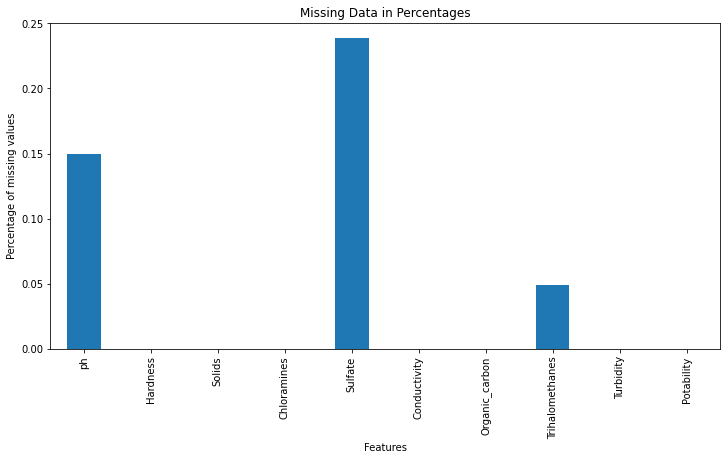

In [ ]:
data.isnull().mean().plot.bar(figsize=(12,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

Here taking each feature at a time and plotting it against the potability. The KDE(Kernel Density Estimate) and box plots have been created
to display the distribution of the dataset. It shows the distribution of each feature within the dataset with repect to the potability feature.

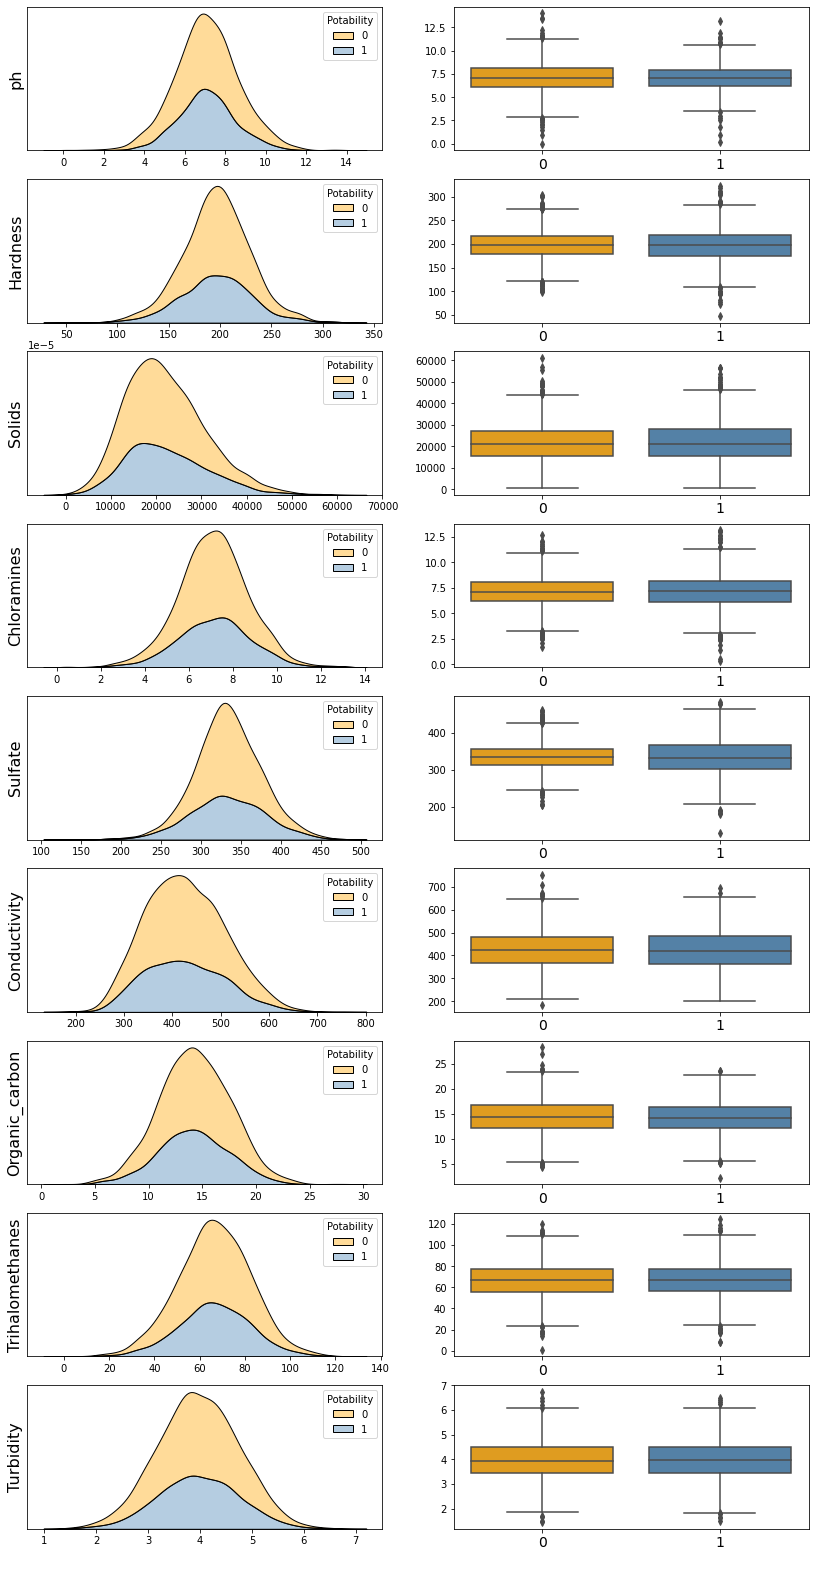

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=9, figsize=(14, 28))

features = list(data.columns.drop('Potability'))
i=0
for cols in features:
    sb.kdeplot(data[cols], fill=True, alpha=0.4, hue = data.Potability, 
                palette=('orange', 'steelblue'), multiple='stack', ax=ax[i,0])
    
    sb.boxplot(data= data, y=cols, x='Potability', ax=ax[i, 1],
               palette=('orange', 'steelblue'))
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    ax[i,0].tick_params(left=False, labelleft=False)
    ax[i,0].set_ylabel(cols, fontsize=16)
    i=i+1
      
# plt.show()

Removing Outliers 

In [ ]:
print("Before removing Outlier,Data Length: ",len(data))
def outlier_IQR(data_column):
    Q1=data_column.quantile(0.20)
    Q3=data_column.quantile(0.80)
    IQR=Q3-Q1
    data_final=data[((data_column<(Q1-1.5*IQR)) | (data_column>(Q3+1.5*IQR)))]
    return data_final

for column in data.columns:
  data_outlier_removed=outlier_IQR(data[column])
  data_outlier_removed=pd. DataFrame(data_outlier_removed)
  data.drop(data_outlier_removed.index,inplace = True)

print("After removing Outlier,Data Length: ",len(data))

Before removing Outlier,Data Length:  3276
After removing Outlier,Data Length:  3210


Filling null values with mean values according to potability


In [ ]:
ph_na_0=data[data["Potability"]==0]["ph"].mean(skipna=True)
data.loc[(data["Potability"]==0) & (data["ph"].isna()),"ph"] = ph_na_0

ph_na_1 =data[data["Potability"]==1]["ph"].mean(skipna=True)
data.loc[(data["Potability"]==1) & (data["ph"].isna()),"ph"] = ph_na_1

sulfate_na_0=data[data["Potability"]==0]["Sulfate"].mean(skipna=True)
data.loc[(data["Potability"]==0) & (data["Sulfate"].isna()),"Sulfate"] = sulfate_na_0

sulfate_na_1=data[data["Potability"]==1]["Sulfate"].mean(skipna=True)
data.loc[(data["Potability"]==1) & (data["Sulfate"].isna()),"Sulfate"] = sulfate_na_1

trih_na_0=data[data["Potability"]==0]["Trihalomethanes"].mean(skipna=True)
data.loc[(data["Potability"]==0) & (data["Trihalomethanes"].isna()),"Trihalomethanes"] = trih_na_0

trih_na_1=data[data["Potability"]==1]["Trihalomethanes"].mean(skipna=True)
data.loc[(data["Potability"]==1) & (data["Trihalomethanes"].isna()),"Trihalomethanes"] = trih_na_1



In [ ]:
data.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

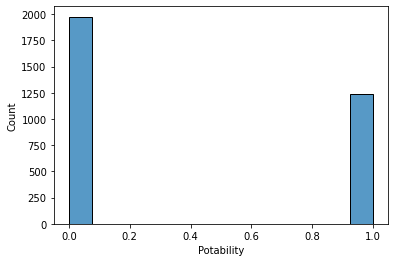

In [ ]:
sb.histplot(data = data["Potability"])

Graphical representation of the distribution of the dataset giving portability as 1 and 0. 

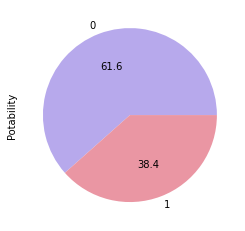

In [ ]:
data['Potability'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f", colors = ['#b7a9ec', '#ea96a3'])

Correlation Matrix

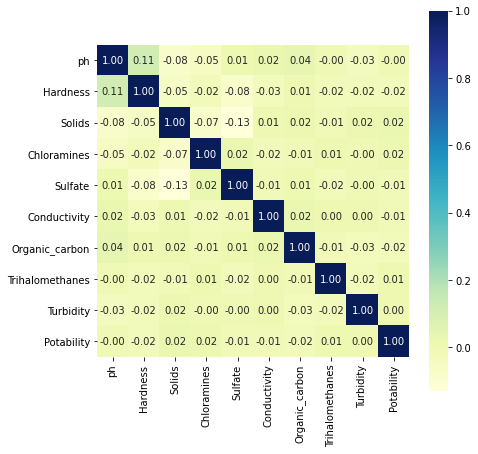

In [ ]:
Corrmat = data.corr()
plt.subplots(figsize=(7,7))
sns.heatmap(Corrmat, cmap="YlGnBu", square = True, annot=True, fmt='.2f')
plt.show()

In [ ]:
print('Correlation of Potability with feature variables:')
features = list(data.columns.drop('Potability'))

Corr = list()
for cols in features:
    Corr.append(data[cols].corr(data['Potability']))

corrDf = pd.DataFrame({'Features' : features, 'Corr' : Corr})
corrDf['Corr'] = corrDf['Corr'].abs()
corrDf.sort_values(by='Corr', ascending = True)

Correlation of Potability with feature variables:


,Features,Corr
0,ph,0.002030
8,Turbidity,0.004224
5,Conductivity,0.007044
7,Trihalomethanes,0.011072
4,Sulfate,0.013119
1,Hardness,0.016619
3,Chloramines,0.017704
6,Organic_carbon,0.021272
2,Solids,0.022157


In [ ]:
from sklearn.model_selection import train_test_split

x_data = data.drop("Potability",axis =1)
y_data = data.Potability
#splitting data in train test 
x_train, x_test,y_train,y_test =  train_test_split(x_data,y_data, test_size=0.2,random_state = 12)



Data is imbalanced with potability values 

1.   Potabilty 0: 1576
2.   Potabilty 1: 992


  

In [ ]:
print('Balancing the data by SMOTE\n')
smt = SMOTE()

counter = Counter(y_train)
print('Before SMOTE: ', counter)

x_train, y_train = smt.fit_resample(x_train, y_train)

counter = Counter(y_train)
print('After SMOTE: ', counter)


Balancing the data by SMOTE

Before SMOTE:  Counter({0: 1576, 1: 992})
After SMOTE:  Counter({0: 1576, 1: 1576})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


([<matplotlib.patches.Wedge at 0x7f9983216f50>,
 [Text(6.735557395310444e-17, 1.1, '0'),
  Text(-2.0206672185931328e-16, -1.1, '1')],
 [Text(3.6739403974420595e-17, 0.6, '50.0'),
  Text(-1.1021821192326178e-16, -0.6, '50.0')])

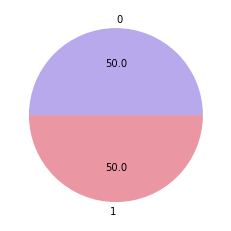

In [ ]:
unqiue_value,value_count = np.unique(y_train, return_counts=True)
plt.pie(x=value_count, autopct="%.1f",labels = [0,1] ,colors = ['#b7a9ec', '#ea96a3'])

Model Evaluation

LogisticRegression


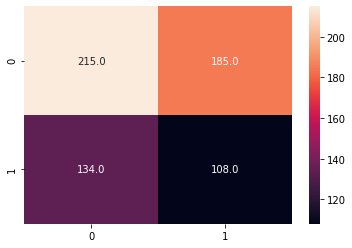

RandomForestClassifier


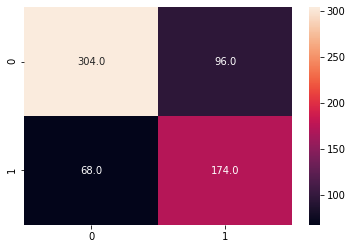

DecisionTreeClassifier


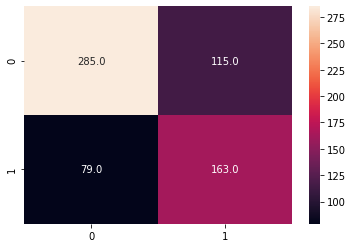

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
models = [LogisticRegression(), RandomForestClassifier(n_estimators = 20, random_state = 0), DecisionTreeClassifier()]
model_names = ['LogisticRegression','RandomForestClassifier', 'DecisionTreeClassifier']

acc = []

for model in range(len(models)):
    class_model = models[model]
    class_model.fit(x_train, y_train)
    pred = class_model.predict(x_test)
    acc.append(accuracy_score(pred, y_test))
    cf_matrix = confusion_matrix(y_test, pred)
    print(model_names[model])
    sns.heatmap(cf_matrix, annot=True,fmt = '.1f')
    plt.show()

models = {'Modelling Algo': model_names, 'Accuracy': acc}

In [ ]:
accuracy_model = pd.DataFrame(models)
accuracy_model


,Modelling Algo,Accuracy
0,LogisticRegression,0.503115
1,RandomForestClassifier,0.744548
2,DecisionTreeClassifier,0.697819
